<a id='sec0'></a>
# Calibrating RandomForest on gender-imbalanced dataset
- Hyperparameters set at default because they did not affect the result much
- Probability calibrated

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

import my_scoring_functions as msf

%matplotlib inline

# Setting up Data (This time tried to label subscriber as 0)

In [2]:
d2013 = pd.read_csv('../data/for_predictions/2013_membership_pred.csv')
d2014 = pd.read_csv('../data/for_predictions/2014_membership_pred.csv')
d2015 = pd.read_csv('../data/for_predictions/2015_membership_pred.csv')
d2016 = pd.read_csv('../data/for_predictions/2016_membership_pred.csv')
d2017 = pd.read_csv('../data/for_predictions/2017_membership_pred.csv')

In [3]:
all_data = [d2013, d2014, d2015, d2016, d2017]

In [4]:
total = 0
total_nonsub = 0
for i in range(len(all_data)):
    year = i + 2013
    d = all_data[i]
    nonsubs_num = len(d[d['usertype'] == 'Customer'])
    total += len(d)
    total_nonsub += nonsubs_num
    print('# Non-subscriber Entries in %d = %d' % (year, nonsubs_num))
print('Total # Non-subscriber Entries = %d (out of %d)' % (total_nonsub, total))
print('%% of Non-subscriber Entries = %f' % (100 * total_nonsub / total))

# Non-subscriber Entries in 2013 = 666940
# Non-subscriber Entries in 2014 = 793495
# Non-subscriber Entries in 2015 = 1311331
# Non-subscriber Entries in 2016 = 1508073
# Non-subscriber Entries in 2017 = 92711
Total # Non-subscriber Entries = 4372550 (out of 39096233)
% of Non-subscriber Entries = 11.184070


In [5]:
all_data = None

In [6]:
#data = pd.concat([d2015, d2016, d2017], axis=0)
data = pd.concat([d2013, d2014, d2015, d2016, d2017], axis=0)
data = data.dropna()

In [7]:
data.columns

Index(['tripduration', 'start station latitude', 'start station longitude',
       'end station latitude', 'end station longitude', 'start_year',
       'start_month', 'start_day', 'start_hour', 'start_dayofweek', 'gender',
       'usertype'],
      dtype='object')

In [8]:
data.head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,start_year,start_month,start_day,start_hour,start_dayofweek,gender,usertype
0,634,40.753231,-73.970325,40.732219,-73.981656,2013,7,1,0,0,0,Customer
1,1547,40.749718,-74.002950,40.746745,-74.007756,2013,7,1,0,0,0,Customer
2,178,40.730287,-73.990765,40.730473,-73.986724,2013,7,1,0,0,2,Subscriber
3,1580,40.718939,-73.992663,40.769155,-73.981918,2013,7,1,0,0,0,Customer
4,757,40.734927,-73.992005,40.720664,-73.985180,2013,7,1,0,0,1,Subscriber


In [9]:
data.describe().round(0)

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,start_year,start_month,start_day,start_hour,start_dayofweek,gender
count,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0
mean,920.0,41.0,-74.0,41.0,-74.0,2015.0,7.0,16.0,14.0,3.0,1.0
std,7616.0,0.0,0.0,0.0,0.0,1.0,3.0,9.0,5.0,2.0,1.0
min,60.0,0.0,-74.0,0.0,-74.0,2013.0,1.0,1.0,0.0,0.0,0.0
25%,385.0,41.0,-74.0,41.0,-74.0,2014.0,5.0,8.0,10.0,1.0,1.0
50%,623.0,41.0,-74.0,41.0,-74.0,2015.0,8.0,16.0,15.0,3.0,1.0
75%,1042.0,41.0,-74.0,41.0,-74.0,2016.0,10.0,23.0,18.0,4.0,1.0
max,8933552.0,41.0,0.0,41.0,0.0,2017.0,12.0,31.0,23.0,6.0,2.0


In [10]:
# Store name of the features for later use
feature_labels = data.columns[:-1]

In [11]:
# Create X and y for sklearn
X = data[data.columns[:-1]].astype(np.float)
y = (data['usertype'] == 'Customer').values.astype(np.int)

In [12]:
# Clear memory
data = None

# RandomForest with Probability Calibration

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [14]:
clf = RandomForestClassifier(n_jobs=4)

Logistic:
	Brier: 0.020
	Precision: 0.914
	Recall: 0.855
	F1: 0.883
	Ave. Precision Score: 0.928

RFC:
	Brier: 0.004
	Precision: 0.977
	Recall: 0.985
	F1: 0.981
	Ave. Precision Score: 0.994

RFC + Isotonic:
	Brier: 0.004
	Precision: 0.971
	Recall: 0.989
	F1: 0.980
	Ave. Precision Score: 0.995

RFC + Sigmoid:
	Brier: 0.004
	Precision: 0.975
	Recall: 0.985
	F1: 0.980
	Ave. Precision Score: 0.995



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


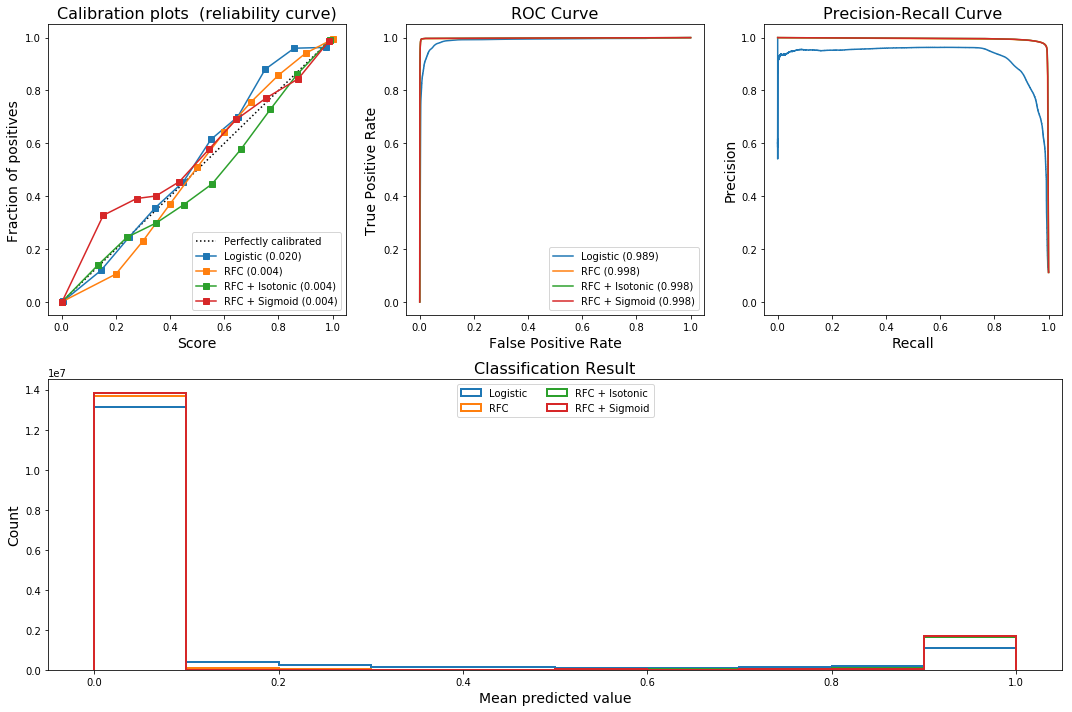

CPU times: user 1h 35min 16s, sys: 2min 50s, total: 1h 38min 7s
Wall time: 33min 57s


In [15]:
%%time
# Use custome function to conduct calibration
d = [X_train, X_test, y_train, y_test]
msf.plot_calibration_curve(clf, 'RFC', 1, d)